# STRPy: Basic Usage Tutorial

This notebook demonstrates the basic usage of the STRPy package for seasonal-trend decomposition using regression.

## Overview

STR (Seasonal-Trend decomposition using Regression) is a flexible method for decomposing time series into:
- **Trend**: Smooth underlying pattern
- **Seasonal components**: Multiple periodic patterns
- **Remainder**: Residual noise

This tutorial covers:
1. Generating synthetic time series data
2. Understanding the components
3. Visualization
4. Next steps for decomposition

## 1. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from strpy import generate_synthetic_data
from strpy.simulations import generate_trend, generate_seasonal, rmse

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

print("STRPy loaded successfully!")

STRPy loaded successfully!


## 2. Generate Synthetic Data

Let's create a synthetic time series with known components. This is useful for:
- Testing decomposition algorithms
- Understanding how different components interact
- Validating results

In [2]:
# Generate 3 years of daily data with weekly and yearly seasonality
df = generate_synthetic_data(
    n=1096,              # 3 years of daily data (365 * 3 + 1)
    periods=(7, 365),    # Weekly and yearly patterns
    alpha=1.0,           # Weight for weekly seasonal
    beta=1.0,            # Weight for yearly seasonal
    gamma=0.25,          # Weight for noise
    data_type="stochastic",  # Use stochastic data generation
    random_seed=42
)

print(f"Generated {len(df)} observations")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Generated 1096 observations

Columns: ['trend', 'remainder', 'data', 'seasonal_1', 'seasonal_2']

First few rows:


,trend,remainder,data,seasonal_1,seasonal_2
0,-1.473167,-0.223837,-5.204555,-1.728690,-1.778861
1,-1.471656,-0.102025,-5.071967,-1.725753,-1.772532
2,-1.470105,-0.248954,-5.207842,-1.721971,-1.766812
3,-1.468538,0.162784,-4.786002,-1.721116,-1.759132
4,-1.466927,0.214613,-4.725858,-1.718370,-1.755174


### Data Structure

The generated DataFrame contains:
- `trend`: Smooth underlying trend
- `seasonal_1`: First seasonal component (weekly)
- `seasonal_2`: Second seasonal component (yearly)
- `remainder`: Random noise
- `data`: Combined time series = trend + seasonal_1 + seasonal_2 + remainder

In [3]:
# Verify the additive decomposition
reconstructed = df['trend'] + df['seasonal_1'] + df['seasonal_2'] + df['remainder']
np.allclose(df['data'], reconstructed)

True

## 3. Visualize Components

Let's plot each component to understand their characteristics.

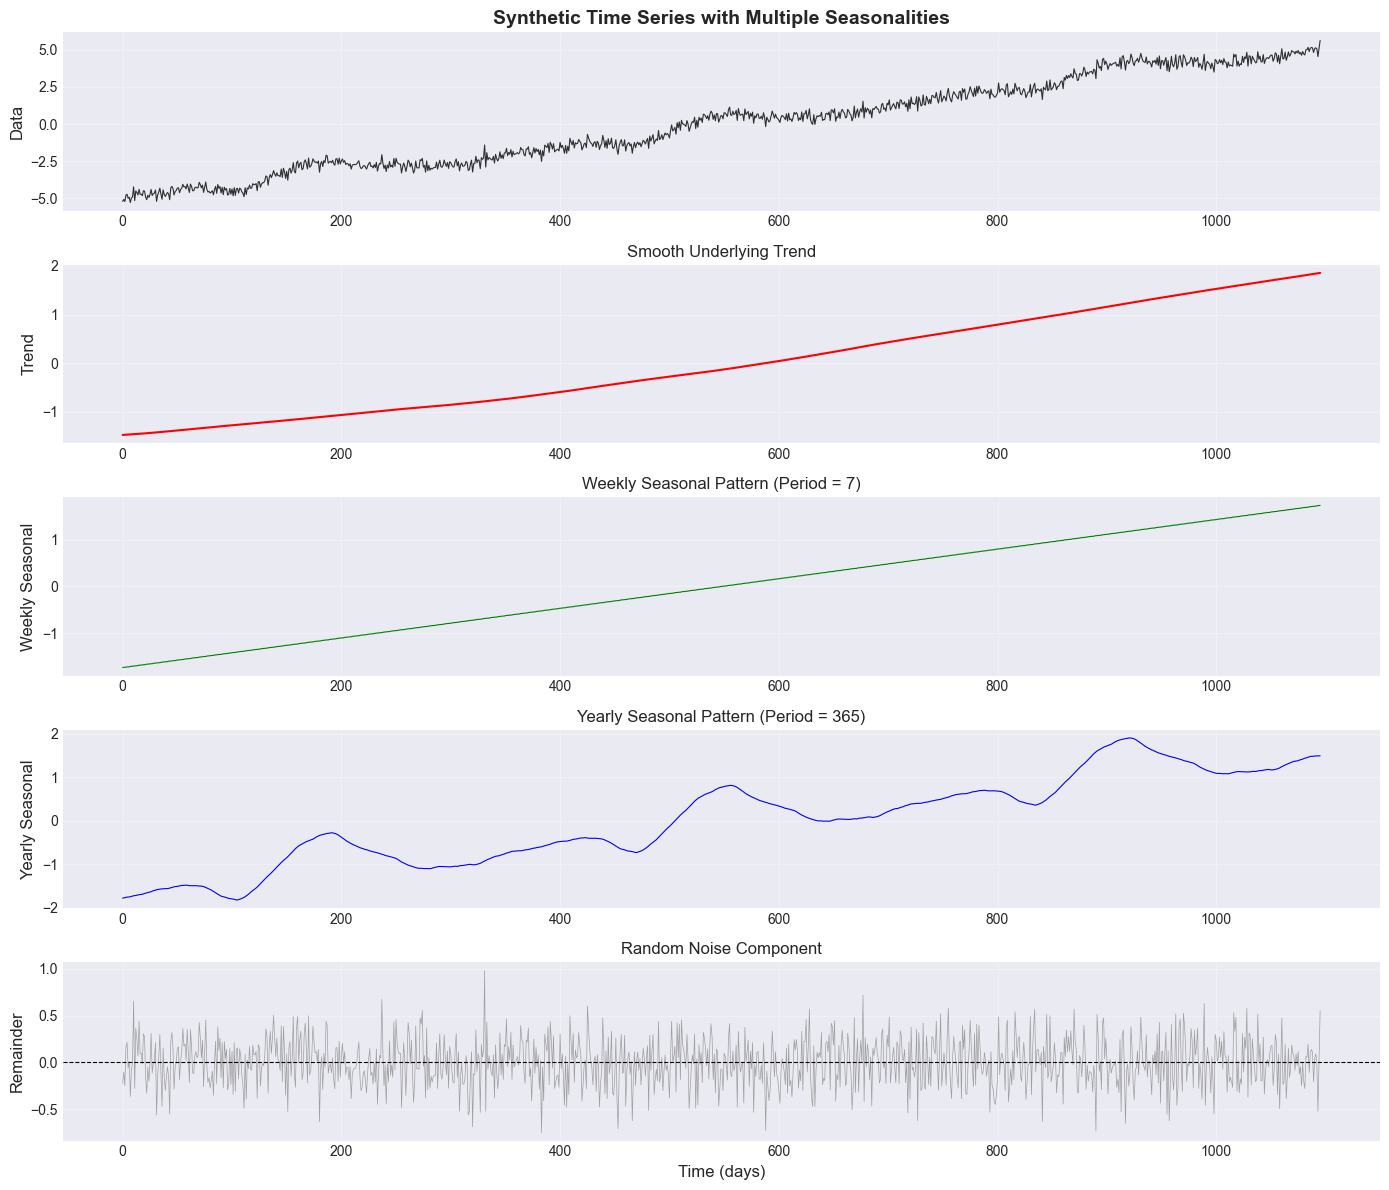


Component Statistics:
              trend    seasonal_1   seasonal_2    remainder
count  1.096000e+03  1.096000e+03  1096.000000  1096.000000
mean   1.037289e-16  5.186443e-17     0.000000     0.001726
std    1.000457e+00  1.000457e+00     1.000457     0.254650
min   -1.473167e+00 -1.728690e+00    -1.820686    -0.747784
25%   -9.043192e-01 -8.636217e-01    -0.736359    -0.176994
50%   -1.342040e-01  1.869304e-03     0.046268     0.002460
75%    8.712446e-01  8.668399e-01     0.692993     0.170732
max    1.857043e+00  1.730347e+00     1.906484     0.981559


In [4]:
fig, axes = plt.subplots(5, 1, figsize=(14, 12))

# Time axis (in days)
t = np.arange(len(df))

# 1. Original data
axes[0].plot(t, df['data'], 'k-', linewidth=0.8, alpha=0.8)
axes[0].set_ylabel('Data', fontsize=12)
axes[0].set_title('Synthetic Time Series with Multiple Seasonalities', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Trend
axes[1].plot(t, df['trend'], 'r-', linewidth=1.5)
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].set_title('Smooth Underlying Trend', fontsize=12)
axes[1].grid(True, alpha=0.3)

# 3. Weekly seasonal
axes[2].plot(t, df['seasonal_1'], 'g-', linewidth=0.8)
axes[2].set_ylabel('Weekly Seasonal', fontsize=12)
axes[2].set_title('Weekly Seasonal Pattern (Period = 7)', fontsize=12)
axes[2].grid(True, alpha=0.3)

# 4. Yearly seasonal
axes[3].plot(t, df['seasonal_2'], 'b-', linewidth=0.8)
axes[3].set_ylabel('Yearly Seasonal', fontsize=12)
axes[3].set_title('Yearly Seasonal Pattern (Period = 365)', fontsize=12)
axes[3].grid(True, alpha=0.3)

# 5. Remainder
axes[4].plot(t, df['remainder'], 'gray', linewidth=0.5, alpha=0.7)
axes[4].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
axes[4].set_ylabel('Remainder', fontsize=12)
axes[4].set_xlabel('Time (days)', fontsize=12)
axes[4].set_title('Random Noise Component', fontsize=12)
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nComponent Statistics:")
print(df[['trend', 'seasonal_1', 'seasonal_2', 'remainder']].describe())

## 4. Examine Seasonal Patterns in Detail

Let's zoom in on the seasonal patterns to see them more clearly.

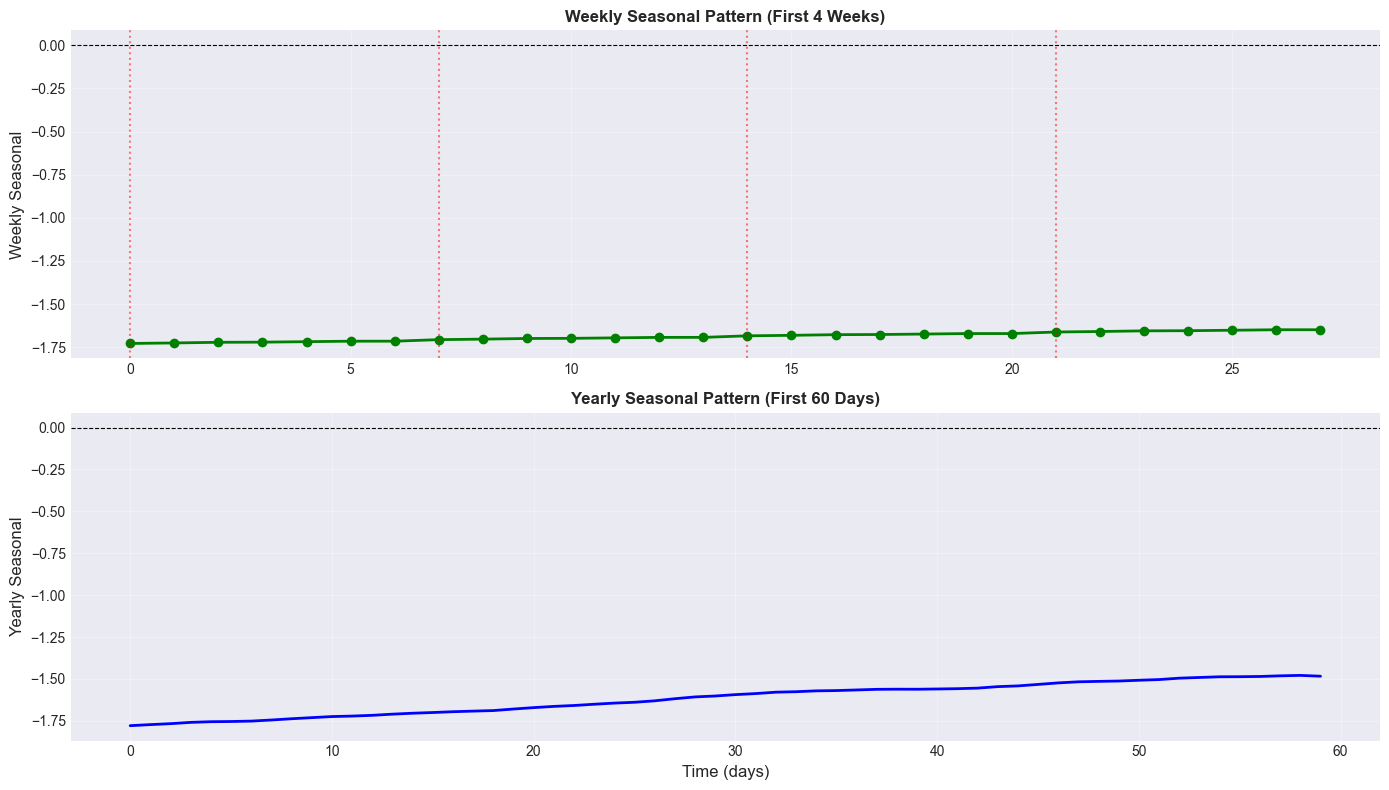

In [5]:
# Plot first 4 weeks to see weekly pattern
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

days = 28  # 4 weeks
t_short = np.arange(days)

# Weekly seasonal pattern
axes[0].plot(t_short, df['seasonal_1'][:days], 'go-', linewidth=2, markersize=6)
axes[0].set_ylabel('Weekly Seasonal', fontsize=12)
axes[0].set_title('Weekly Seasonal Pattern (First 4 Weeks)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', linewidth=0.8)

# Mark weeks
for week in range(4):
    axes[0].axvline(x=week*7, color='red', linestyle=':', alpha=0.5)

# Yearly seasonal pattern (first 60 days)
days_year = 60
t_year = np.arange(days_year)
axes[1].plot(t_year, df['seasonal_2'][:days_year], 'b-', linewidth=2)
axes[1].set_ylabel('Yearly Seasonal', fontsize=12)
axes[1].set_xlabel('Time (days)', fontsize=12)
axes[1].set_title('Yearly Seasonal Pattern (First 60 Days)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

## 5. Compare Different Data Generation Types

STRPy supports two types of data generation:
- **Stochastic**: Uses random walks and smooth random patterns
- **Deterministic**: Uses Fourier series with random coefficients

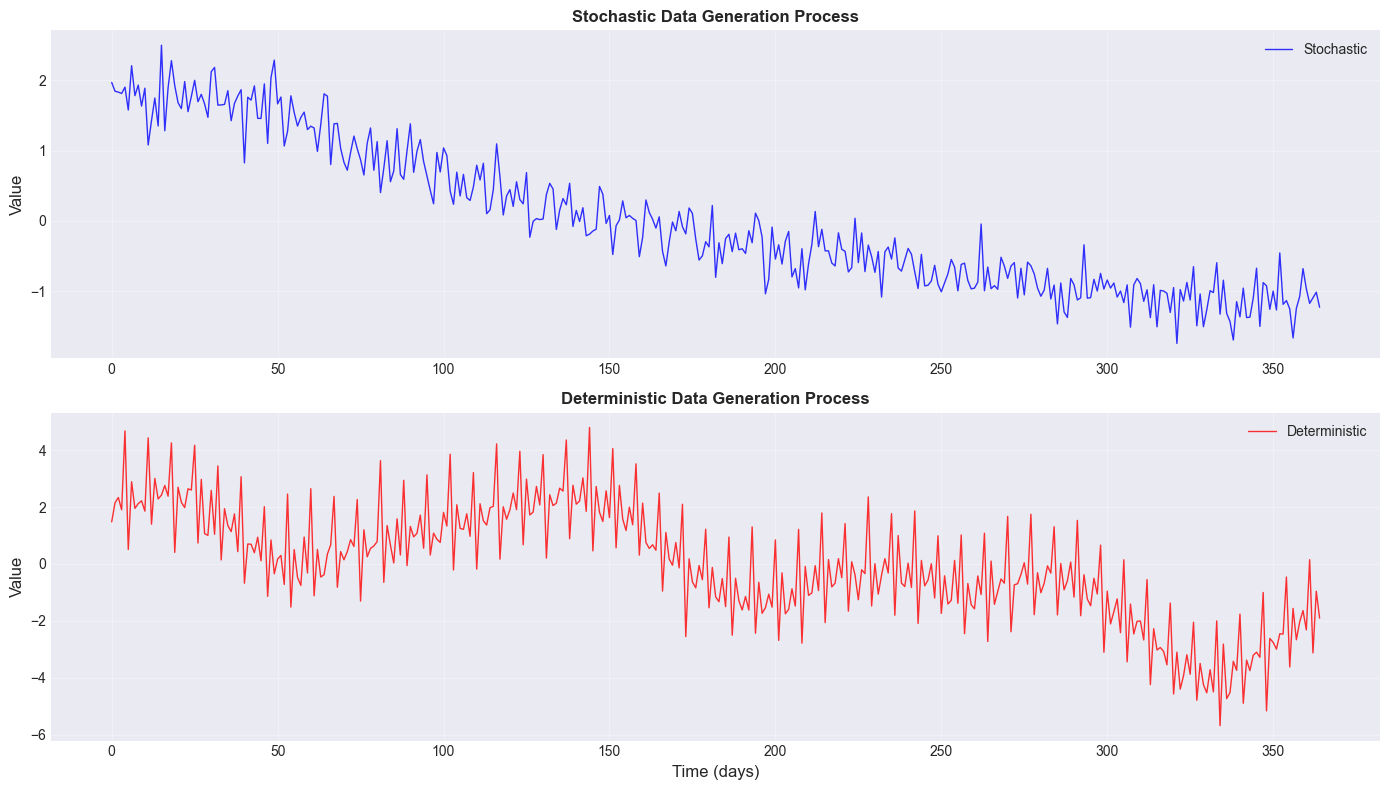


Stochastic vs Deterministic Characteristics:
Stochastic - Mean: 0.014, Std: 1.026
Deterministic - Mean: -0.022, Std: 2.032


In [6]:
# Generate both types
n_compare = 365  # 1 year

df_stochastic = generate_synthetic_data(
    n=n_compare, periods=(7, 365), gamma=0.3,
    data_type="stochastic", random_seed=123
)

df_deterministic = generate_synthetic_data(
    n=n_compare, periods=(7, 365), gamma=0.3,
    data_type="deterministic", random_seed=123
)

# Plot comparison
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(df_stochastic['data'], 'b-', linewidth=1, alpha=0.8, label='Stochastic')
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('Stochastic Data Generation Process', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(df_deterministic['data'], 'r-', linewidth=1, alpha=0.8, label='Deterministic')
axes[1].set_ylabel('Value', fontsize=12)
axes[1].set_xlabel('Time (days)', fontsize=12)
axes[1].set_title('Deterministic Data Generation Process', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nStochastic vs Deterministic Characteristics:")
print(f"Stochastic - Mean: {df_stochastic['data'].mean():.3f}, Std: {df_stochastic['data'].std():.3f}")
print(f"Deterministic - Mean: {df_deterministic['data'].mean():.3f}, Std: {df_deterministic['data'].std():.3f}")

## 6. Analyze Component Contributions

Let's see how much each component contributes to the overall variance.

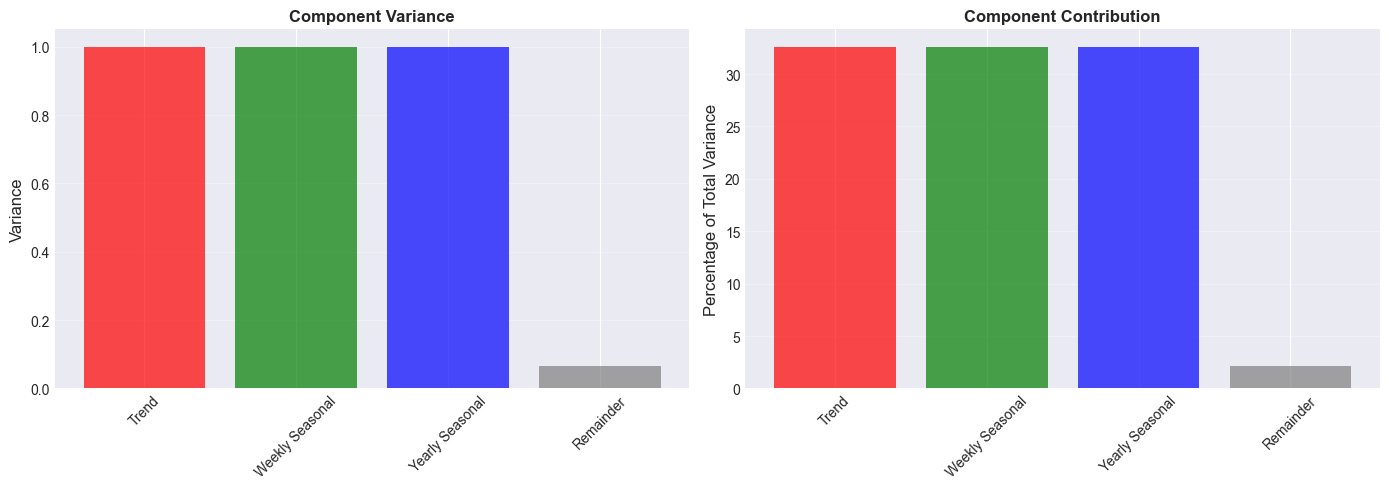


Component Contributions:
Trend               :  32.63%
Weekly Seasonal     :  32.63%
Yearly Seasonal     :  32.63%
Remainder           :   2.11%


In [7]:
# Calculate variance of each component
variances = {
    'Trend': df['trend'].var(),
    'Weekly Seasonal': df['seasonal_1'].var(),
    'Yearly Seasonal': df['seasonal_2'].var(),
    'Remainder': df['remainder'].var(),
}

total_var = sum(variances.values())
percentages = {k: 100 * v / total_var for k, v in variances.items()}

# Create bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Variance
ax1.bar(variances.keys(), variances.values(), color=['red', 'green', 'blue', 'gray'], alpha=0.7)
ax1.set_ylabel('Variance', fontsize=12)
ax1.set_title('Component Variance', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Percentage
ax2.bar(percentages.keys(), percentages.values(), color=['red', 'green', 'blue', 'gray'], alpha=0.7)
ax2.set_ylabel('Percentage of Total Variance', fontsize=12)
ax2.set_title('Component Contribution', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nComponent Contributions:")
for component, pct in percentages.items():
    print(f"{component:20s}: {pct:6.2f}%")

## 7. Effect of Noise Level

Let's see how different noise levels affect the time series.

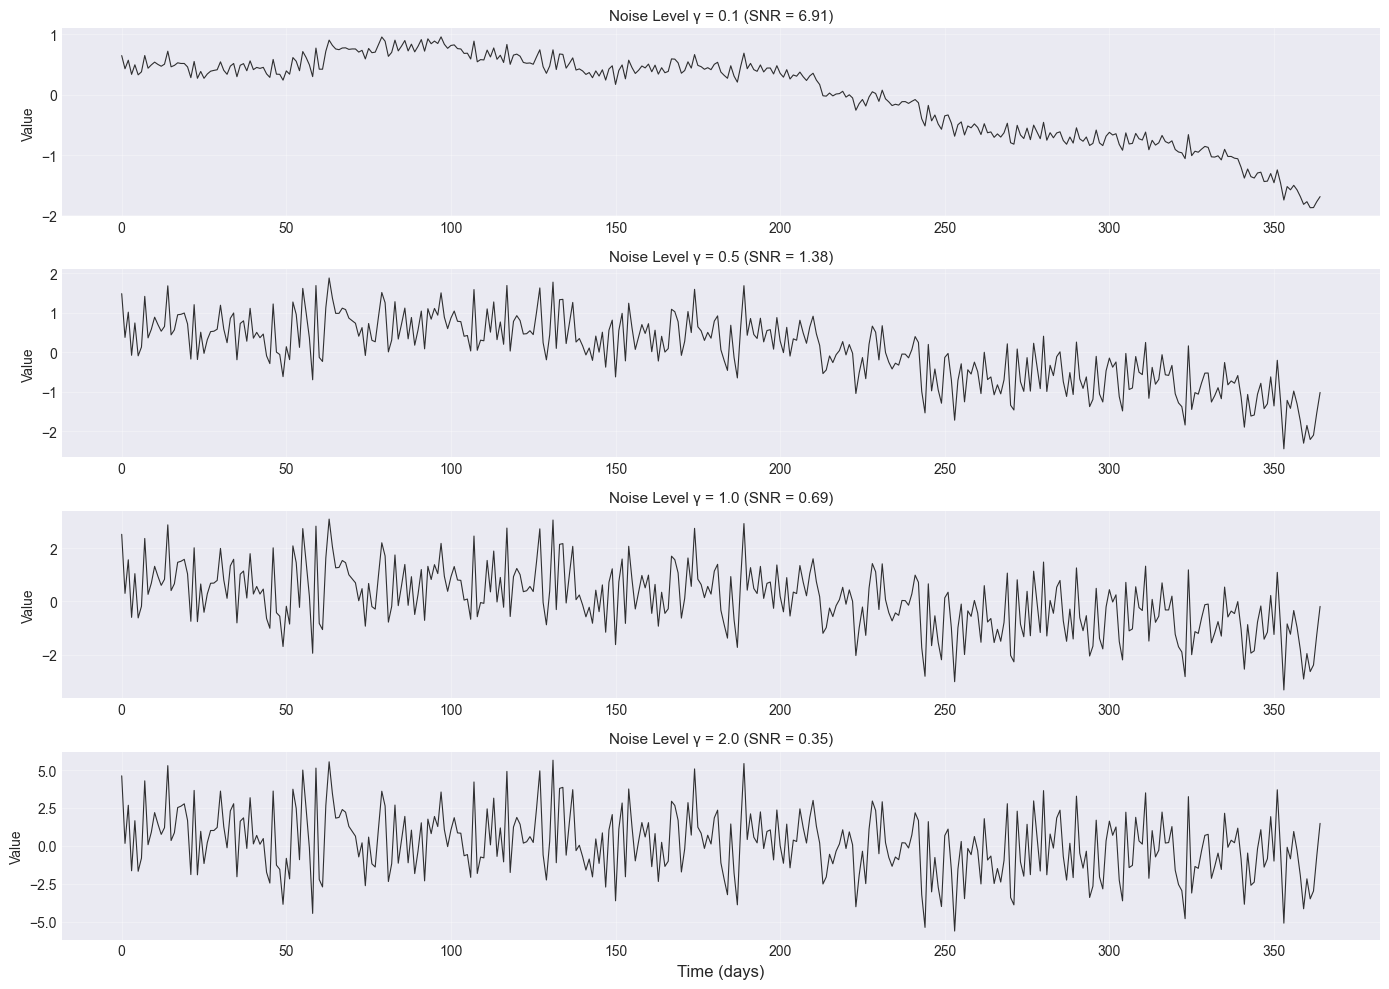

In [8]:
# Generate data with different noise levels
noise_levels = [0.1, 0.5, 1.0, 2.0]
n_noise = 365

fig, axes = plt.subplots(len(noise_levels), 1, figsize=(14, 10))

for i, gamma in enumerate(noise_levels):
    df_noise = generate_synthetic_data(
        n=n_noise, periods=(7, 365), gamma=gamma,
        data_type="stochastic", random_seed=42
    )
    
    # Signal-to-noise ratio
    signal = df_noise['trend'] + df_noise['seasonal_1'] + df_noise['seasonal_2']
    snr = signal.std() / df_noise['remainder'].std()
    
    axes[i].plot(df_noise['data'], 'k-', linewidth=0.8, alpha=0.8)
    axes[i].set_ylabel('Value', fontsize=10)
    axes[i].set_title(f'Noise Level γ = {gamma:.1f} (SNR = {snr:.2f})', fontsize=11)
    axes[i].grid(True, alpha=0.3)

axes[-1].set_xlabel('Time (days)', fontsize=12)
plt.tight_layout()
plt.show()

## 8. Generate Individual Components

You can also generate individual components separately for more control.

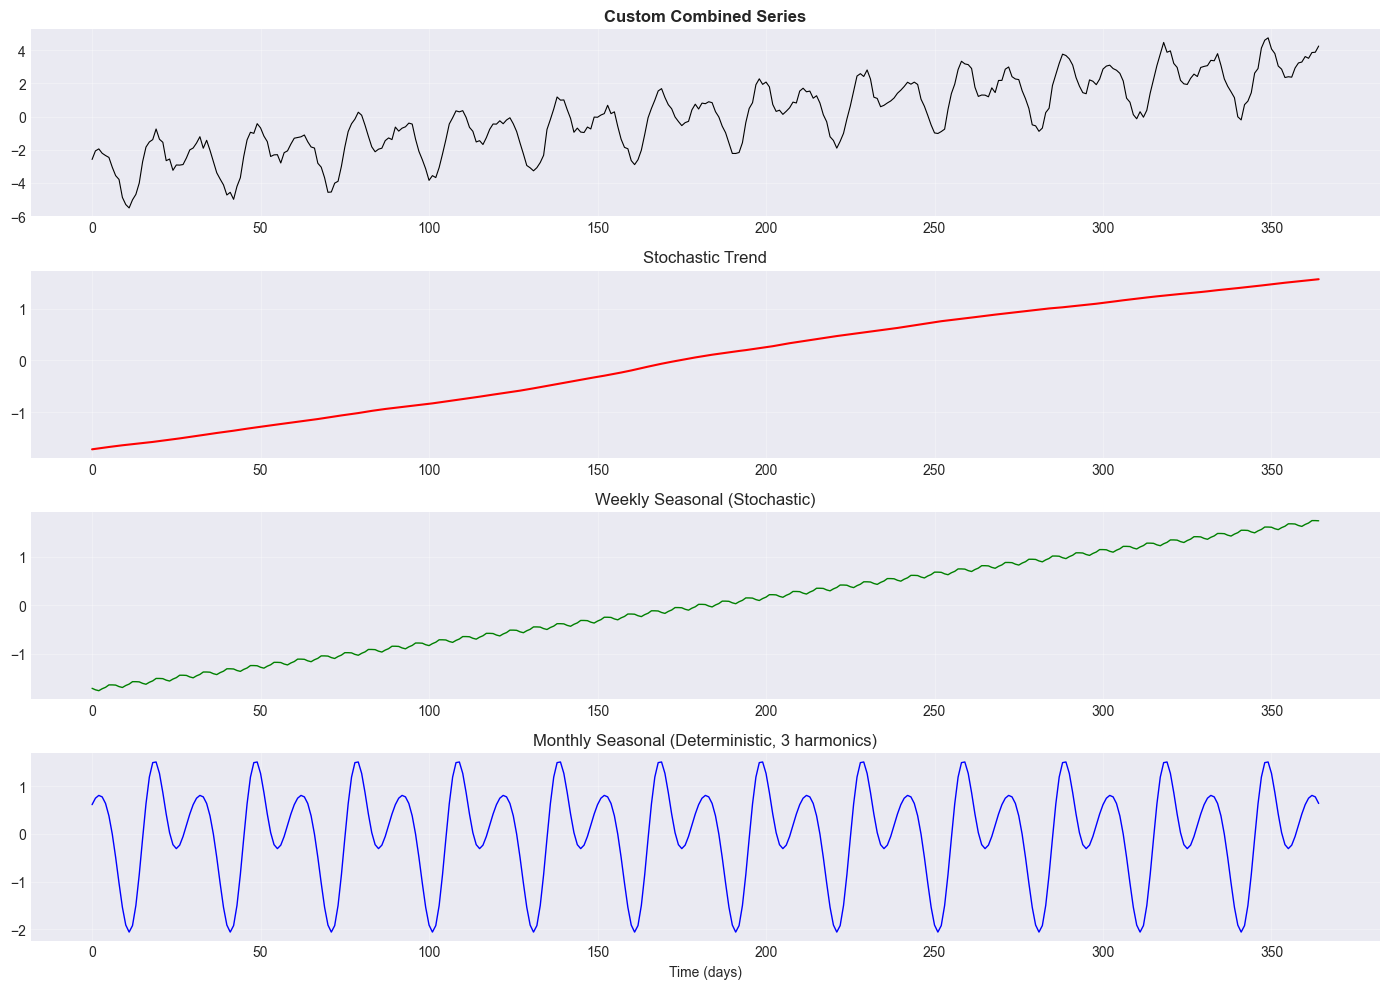

In [9]:
from strpy.simulations import generate_trend, generate_seasonal

n = 365

# Generate components separately
trend = generate_trend(n, trend_type="stochastic")
weekly_seasonal = generate_seasonal(n, period=7, seasonal_type="stochastic")
monthly_seasonal = generate_seasonal(n, period=30, seasonal_type="deterministic", n_harmonics=3)

# Combine with custom weights
custom_data = trend + 0.8 * weekly_seasonal + 1.2 * monthly_seasonal + 0.2 * np.random.randn(n)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(custom_data, 'k-', linewidth=0.8)
axes[0].set_title('Custom Combined Series', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(trend, 'r-', linewidth=1.5)
axes[1].set_title('Stochastic Trend')
axes[1].grid(True, alpha=0.3)

axes[2].plot(weekly_seasonal, 'g-', linewidth=1)
axes[2].set_title('Weekly Seasonal (Stochastic)')
axes[2].grid(True, alpha=0.3)

axes[3].plot(monthly_seasonal, 'b-', linewidth=1)
axes[3].set_title('Monthly Seasonal (Deterministic, 3 harmonics)')
axes[3].set_xlabel('Time (days)')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Summary Statistics

In [10]:
# Create summary table
summary = pd.DataFrame({
    'Component': ['Data', 'Trend', 'Weekly Seasonal', 'Yearly Seasonal', 'Remainder'],
    'Mean': [
        df['data'].mean(),
        df['trend'].mean(),
        df['seasonal_1'].mean(),
        df['seasonal_2'].mean(),
        df['remainder'].mean()
    ],
    'Std Dev': [
        df['data'].std(),
        df['trend'].std(),
        df['seasonal_1'].std(),
        df['seasonal_2'].std(),
        df['remainder'].std()
    ],
    'Min': [
        df['data'].min(),
        df['trend'].min(),
        df['seasonal_1'].min(),
        df['seasonal_2'].min(),
        df['remainder'].min()
    ],
    'Max': [
        df['data'].max(),
        df['trend'].max(),
        df['seasonal_1'].max(),
        df['seasonal_2'].max(),
        df['remainder'].max()
    ]
})

print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)
print(summary.to_string(index=False))
print("="*70)


SUMMARY STATISTICS
      Component         Mean  Std Dev       Min      Max
           Data 1.726420e-03 2.967036 -5.275982 5.635751
          Trend 1.037289e-16 1.000457 -1.473167 1.857043
Weekly Seasonal 5.186443e-17 1.000457 -1.728690 1.730347
Yearly Seasonal 0.000000e+00 1.000457 -1.820686 1.906484
      Remainder 1.726420e-03 0.254650 -0.747784 0.981559


## 10. Next Steps

### Coming Soon: STR Decomposition

The full STR decomposition algorithm is under development. When complete, you'll be able to:

```python
from strpy import AutoSTR

# Automatic decomposition
result = AutoSTR(
    df['data'].values,
    seasonal_periods=[7, 365],
    confidence=0.95
)

# Access estimated components
trend_est = result.trend
seasonal_weekly_est = result.seasonal[0]
seasonal_yearly_est = result.seasonal[1]
remainder_est = result.remainder

# Compare with true components
from strpy.simulations import rmse
print(f"Trend RMSE: {rmse(df['trend'].values - trend_est):.4f}")
print(f"Weekly RMSE: {rmse(df['seasonal_1'].values - seasonal_weekly_est):.4f}")
print(f"Yearly RMSE: {rmse(df['seasonal_2'].values - seasonal_yearly_est):.4f}")

# Plot with confidence intervals
result.plot()
```

### Features Being Implemented

- ✅ Data generation (complete)
- ✅ Utility functions (complete)
- 🚧 STR decomposition algorithm
- 🚧 Automatic parameter selection via cross-validation
- 🚧 Confidence intervals
- 🚧 Complex seasonal topology (working days vs. holidays)
- 🚧 Time-varying covariate coefficients

### Learn More

- [README.md](../README.md) - Package overview
- [MIGRATION.md](../MIGRATION.md) - R to Python migration guide
- [Original Paper](https://pubsonline.informs.org/doi/10.1287/ijds.2021.0004) - Dokumentov & Hyndman (2022)

---

## Appendix: Save Generated Data

In [ ]:
# Save the generated data for later use
# df.to_csv('../data/synthetic_example.csv', index=False)
# print("Data saved to ../data/synthetic_example.csv")